In [61]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


iris_df = pd.read_csv('/iris.csv')
df


,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [62]:
iris_df.columns = ['Unnamed: 0', 'sepal_length (cm)', 'sepal_width (cm)', 'petal_length (cm)', 'petal_width (cm)', 'target']

In [63]:

iris_df.drop('Unnamed: 0', axis = 1, inplace=True)
iris.head()


,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [37]:
iris.target.drop_duplicates()

0      0
50     1
100    2
Name: target, dtype: int64

In [45]:
R = iris['target']
F = iris.loc[:,'sepal length (cm)': 'petal width (cm)']

In [36]:
df.info

<bound method DataFrame.info of      Unnamed: 0  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0             0                5.1               3.5                1.4   
1             1                4.9               3.0                1.4   
2             2                4.7               3.2                1.3   
3             3                4.6               3.1                1.5   
4             4                5.0               3.6                1.4   
..          ...                ...               ...                ...   
145         145                6.7               3.0                5.2   
146         146                6.3               2.5                5.0   
147         147                6.5               3.0                5.2   
148         148                6.2               3.4                5.4   
149         149                5.9               3.0                5.1   

     petal width (cm)  target  
0                 0.2       0  
1  

In [64]:

F_train, F_test, R_train, R_test = train_test_split(F, R, test_size=0.2, random_state=1)  

In [65]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(F_train, R_train)

DecisionTreeClassifier(random_state=0)

In [66]:
predictions = classifier.predict(F_test)
iris_pred = pd.DataFrame({'Actual': R_test, 'Predictions': predictions})
iris_pred.head()

,Actual,Predictions
14,0,0
98,1,1
75,1,1
16,0,0
131,2,2


In [67]:
from sklearn.metrics import accuracy_score




accuracy = accuracy_score(R_test, R_pred)
print('Accuracy:', accuracy)
df

Accuracy: 0.9666666666666667


,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [68]:
from sklearn.metrics import confusion_matrix
idx = ['actual 0', 'actual 1', 'actual 2']

cm = pd.DataFrame(confusion_matrix(R_test, predictions),
                  columns = ['pred 0', 'pred 1', 'pred 2'],
                  index= idx)
cm

,pred 0,pred 1,pred 2
actual 0,11,0,0
actual 1,0,12,1
actual 2,0,0,6


In [69]:
cols = list(features.columns)
importance = pd.DataFrame({'features':cols, 'importance': classifier.feature_importances_})
importance

,features,importance
0,sepal length (cm),0.007520
1,sepal width (cm),0.018801
2,petal length (cm),0.075846
3,petal width (cm),0.897833


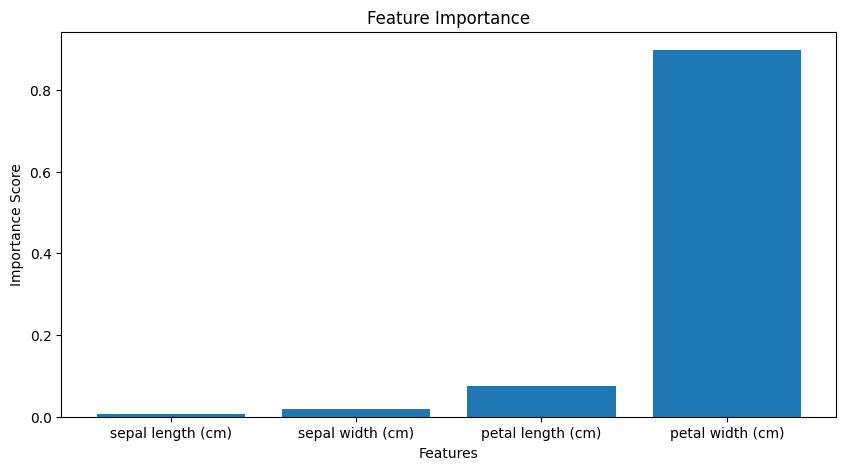

In [70]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,5))
plt.bar(x = cols, height = classifier.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()